In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Feature Scaling Standardization

In [27]:
# 1. import data   
data = pd.read_csv("A:\\py-code\\1 ML\\100-days-of-machine-learning\\day24-standardization\\Social_Network_Ads.csv")

In [28]:
data  = data[["Age",'EstimatedSalary','Purchased']]
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


(None,
               Age  EstimatedSalary   Purchased
 count  400.000000       400.000000  400.000000
 mean    37.655000     69742.500000    0.357500
 std     10.482877     34096.960282    0.479864
 min     18.000000     15000.000000    0.000000
 25%     29.750000     43000.000000    0.000000
 50%     37.000000     70000.000000    0.000000
 75%     46.000000     88000.000000    1.000000
 max     60.000000    150000.000000    1.000000)

In [30]:
# 2. train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns=["Purchased"]),data["Purchased"])

In [31]:
# import class
from sklearn.preprocessing import StandardScaler

# create an object
scale = StandardScaler()

# Let it know the paramters: fit it on train set so that it will learn the paramters
scale.fit(X_train)

# Now apply the transformation (Scaling) on the train and test sets. The scaled output will be numpy array.
X_train_scaled = scale.transform(X_train)
X_test_scaled  = scale.transform(X_test)

# Are you wondering that why don't we converted the Y_train and Y_test? Becuase the Y is a categorical output column we don't need any scaling.

# After applying the Standard Scaling all the values of salary will be scaled(limited/intervaled) in the range of -1 to 1

In [32]:
# Convert the scaled numpy arrays to the pandas data frames. The column names can be extracted from the train set's.
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X_test.columns)

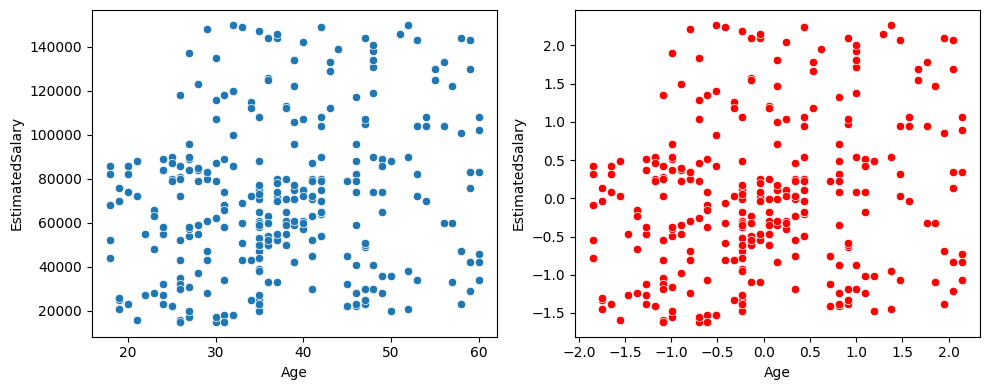

In [33]:

fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(data=X_train, x='Age',y='EstimatedSalary',ax=ax1)
sns.scatterplot(data=X_train_scaled,x='Age',y='EstimatedSalary',ax=ax2, c='r')
fig.tight_layout()

<Axes: title={'center': 'EstimatedSalary distribution after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

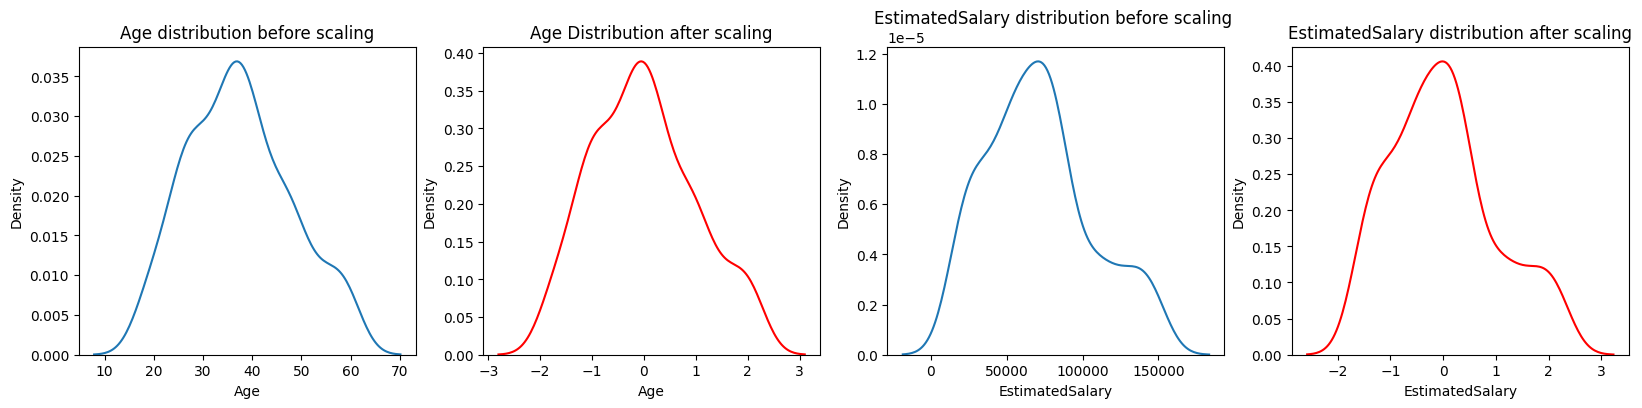

In [34]:
# Not confirm while differntiating both of them? That's why the distribution plots are used.
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(20,4))

ax1.set_title("Age distribution before scaling")
sns.kdeplot(data=X_train,x='Age',ax=ax1)

ax2.set_title("Age Distribution after scaling")
sns.kdeplot(data=X_train_scaled,x='Age',ax=ax2,color='r')

ax3.set_title("EstimatedSalary distribution before scaling ")
sns.kdeplot(data=X_train,x='EstimatedSalary',ax=ax3)

ax4.set_title("EstimatedSalary distribution after scaling")
sns.kdeplot(data=X_train_scaled,x='EstimatedSalary',ax=ax4,c='r')

## Logistic Regression
1. Train + Predict
1. accuracy score
1. cross validation

In [35]:
# Train with logistic regression
from sklearn.linear_model import LogisticRegression
# 1. create object
lr = LogisticRegression()
lr_scaled = LogisticRegression()

# 2. fit
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)


# 3. call model object
LogisticRegression()

# 4. Predict
y_pred = lr.predict(X_test)
y_pred_scaled = lr.predict(X_test_scaled)


In [36]:
print("Actual: ",accuracy_score(Y_test,y_pred=y_pred))
print("Scaled: ",accuracy_score(Y_test,y_pred_scaled))

Actual:  0.77
Scaled:  0.64


In [37]:
# Cross-validation score for non-scaled data
cv_scores_lr = cross_val_score(LogisticRegression(), X_train, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Non-scaled):", np.mean(cv_scores_lr))

# Cross-validation score for scaled data
cv_scores_lr_scaled = cross_val_score(LogisticRegression(), X_train_scaled, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Scaled):", np.mean(cv_scores_lr_scaled))

Cross-validation Accuracy (Non-scaled): 0.8633333333333333
Cross-validation Accuracy (Scaled): 0.8566666666666667


## DecisionTreeClassifier
1. Train + Predict 
1. Accuracy score
1. Cross validation

In [38]:
from sklearn.tree import DecisionTreeClassifier

# 1. create object(s)
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

# 2. Fit 
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

# 3. Call model object
DecisionTreeClassifier()

# 4. Predic
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)


In [39]:
# ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets
# print("Actual: ",accuracy_score(X_test,y_pred))
# print("Scaled: ",accuracy_score(X_test_scaled,y_pred_scaled))

print("Actual: ",accuracy_score(Y_test,y_pred_dt))
print("Scaled: ",accuracy_score(Y_test,y_pred_scaled_dt))

Actual:  0.84
Scaled:  0.83


In [40]:
# Cross-validation score for non-scaled data
cv_scores_lr = cross_val_score(DecisionTreeClassifier(), X_train, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Non-scaled):", np.mean(cv_scores_lr))

# Cross-validation score for scaled data
cv_scores_lr_scaled = cross_val_score(DecisionTreeClassifier(), X_train_scaled, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Scaled):", np.mean(cv_scores_lr_scaled))

Cross-validation Accuracy (Non-scaled): 0.8666666666666666
Cross-validation Accuracy (Scaled): 0.8666666666666666


## KNN
1. Train + Predict
1. Accuracy Score
1. Cross Validation

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Create object(s)
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

# 2. Fit 
knn.fit(X_train, Y_train)
knn_scaled.fit(X_train_scaled, Y_train)

# 3. Call model object (optional, not necessary after fitting)
KNeighborsClassifier()

# 4. Predict
y_pred_knn = knn.predict(X_test)
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)


In [42]:
print("Actual: ",accuracy_score(Y_test,y_pred_knn))
print("Scaled: ",accuracy_score(Y_test,y_pred_knn_scaled))

Actual:  0.84
Scaled:  0.86


In [43]:
# Cross-validation score for non-scaled data
cv_scores_lr = cross_val_score(KNeighborsClassifier(), X_train, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Non-scaled):", np.mean(cv_scores_lr))

# Cross-validation score for scaled data
cv_scores_lr_scaled = cross_val_score(KNeighborsClassifier(), X_train_scaled, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Scaled):", np.mean(cv_scores_lr_scaled))

Cross-validation Accuracy (Non-scaled): 0.7733333333333332
Cross-validation Accuracy (Scaled): 0.9033333333333335


## RandomForestClassifier
1. Train + Predict
1. Accuracy Score
1. Cross Validation

In [44]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create object(s)
rf = RandomForestClassifier()
rf_scaled = RandomForestClassifier()

# 2. Fit 
rf.fit(X_train, Y_train)
rf_scaled.fit(X_train_scaled, Y_train)

# 3. Call model object (optional, not necessary after fitting)
RandomForestClassifier()

# 4. Predict
y_pred_rf = rf.predict(X_test)
y_pred_rf_scaled = rf_scaled.predict(X_test_scaled)


In [45]:
print("Actual: ",accuracy_score(Y_test,y_pred_rf))
print("Scaled: ",accuracy_score(Y_test,y_pred_rf_scaled))

Actual:  0.86
Scaled:  0.86


In [46]:
# Cross-validation score for non-scaled data
cv_scores_lr = cross_val_score(RandomForestClassifier(), X_train, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Non-scaled):", np.mean(cv_scores_lr))

# Cross-validation score for scaled data
cv_scores_lr_scaled = cross_val_score(RandomForestClassifier(), X_train_scaled, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Scaled):", np.mean(cv_scores_lr_scaled))

Cross-validation Accuracy (Non-scaled): 0.8833333333333334
Cross-validation Accuracy (Scaled): 0.8933333333333335


## SVM (Support Vector Machine)
1. Train + Predict
1. Accuracy Score
1. Cross validation

In [47]:
from sklearn.svm import SVC

# 1. Create object(s)
svm = SVC()
svm_scaled = SVC()

# 2. Fit 
svm.fit(X_train, Y_train)
svm_scaled.fit(X_train_scaled, Y_train)

# 3. Call model object (optional, not necessary after fitting)
SVC()

# 4. Predict
y_pred_svm = svm.predict(X_test)
y_pred_svm_scaled = svm_scaled.predict(X_test_scaled)


In [48]:
print("Actual: ",accuracy_score(Y_test,y_pred_svm))
print("Scaled: ",accuracy_score(Y_test,y_pred_svm_scaled))

Actual:  0.68
Scaled:  0.88


In [49]:
# Cross-validation score for non-scaled data
cv_scores_lr = cross_val_score(SVC(), X_train, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Non-scaled):", np.mean(cv_scores_lr))

# Cross-validation score for scaled data
cv_scores_lr_scaled = cross_val_score(SVC(), X_train_scaled, Y_train, scoring='accuracy', cv=20)
print("Cross-validation Accuracy (Scaled):", np.mean(cv_scores_lr_scaled))

Cross-validation Accuracy (Non-scaled): 0.8033333333333333
Cross-validation Accuracy (Scaled): 0.9200000000000002
